# Sentimental Analysis of Apple and Google Tweets for Third-Party Tech Distributors
## Business Understanding
In the recent years, the global smartphone market remained highly competitive, with major brands such as Apple and Google continuing to dominate innovation and customer engagement discussions online.

However, third-party tech distributors, who rely on these brands' public image to drive sales, often lack accessible tools to automatically analyze global customer sentiment.

This limitation makes it difficult for them to gauge market trends, anticipate product reception, or adjust inventory and marketing strategies in real time.

By performing sentiment  analysis on tweets related to Apple and Google products, this project aims to provide real-time insights into how consumers perceive these brands, enabling distributors to make data-driven decisions that align with evolving market sentiments.

### Key Challenges Faced by Third-Party Distributors
1. Limited visibility into global public sentiments towards the products they sell(Apple, Google).
2. Dependence on manual research and online reviews that are often outdated  or subjective.
3. Difficulty identifying sentiment trends after major product releases or controversies
4. Lack of predictive insights to guide marketing, stock, and pricing decisions.

### Stakeholders
1. **Third-Party Distributors and Retailers**: Rely on sentiment data to understand market perception, adjust marketing and manage pproduct portifolios.
2. **Marketing Teams**: Monitor shifts in brand sentiments to align promotions or partnerships.
3. **Product Analysts**: Track performance of specific products and flag potential reputation risks.
4. **Executive Leadership**: Use sentiment trends to guide strategic product stocking and investment.

### Problem Statement
Third-party tech distributors play a crucial role in connecting manufacturers like Apple and Google with global consumers. However, these distributors often lack accessible, domain-specific sentiment analysis tools that can automatically monitor and interpret public opinions about the products they sell.

As a result, many rely on manual market research, delayed reports, or fragmented feedback to understand customer attitudes, limiting their ability to make timely, data-driven decisions about marketing, inventory, and partnerships.

This project seeks to bridge the gap by:
1. Developing an NLP-based sentiment analysis model that classifies tweets about Apple and Google products as positive, negative, or neutral.
2. Deploying the model in a user-friendly web application that provides real-time sentiment insights.
3. Empowering distributors to track brand perception, respond quickly to market trends, and make more informed business decisions.

### Objectives
1. To build an NLP model capable of classifying tweets into sentiment categories(positive, negative, neutral)
2. To identify sentiment patterns and trends across brands(Apple vs Gooogle)
3. To deploy a user-friendly Streamlit web application for real-time sentiment monitoring.
4. To generate insights that support distributors' marketing, pricing and inventory strategies.

### Metrics of Success
This project will be considered successful if:
1. The trained model achieves reliable performance on unseen test data.
2. Sentiment predctions are interpretable and align with human-labeled examples.
3. Business insights are actionable and understandable to non-technical users
4. The Streamit app runs smoothly, with:
   - Accuracy score >= 80% on test data
   - F1-Score >= 0.80 for sentiment classification
   - User-friendly dashboard summarizing key results

## Data Understanding 
To analyze consumer sentiments toward Apple and Google products, we are using the **CrowdFlower Brands and Product Emotions** dataset, sourced from **data.world**. 

This dataset contains **9,093 Tweets** collected from Twitter now X, where human annotators labeled whether each tweet expresses an emotion directed at a specific brand or product.

The dataset provides a reliable foundation for developing a Natural Language Processing(NLP) model capable of understanding how consumers express opinions about major technology brands.

Below is an overview of the dataset and its structure:
1. `tweet_text` : The raw text of the tweet. This is the primary input used for sentiment classification and NLP modeling.
2. `emotion_in_tweet_is directed_at` : The specific brand or product that the tweet's refer to. This column helps identify relevant tweets for Apple and Google.
3. `is_there_an_emotion_directed_at_a_brand_or_product`: The sentiment label assogned to the tweet, indicating the emotional polarity expressed towards the mentioned brand. It can either be **Positive emotion, Negative emotion**, and sometimes **No emotion**

### Data Summary
1. **Total Records**: 9,093 tweets
2. **Columns**: 3
3. **Target Variable**: `is_there_an_emotion_directed_at_a_brand_or_product`
4. **Missing Values**: Some Tweets do not specify a brand or product under `emotion_in_tweet_is directed_at`
5. **Data Type**: All features are stored as object type.

### Data Relevance
This dataset is highly relevant because it captures authentic, user-generated opinions about real-world products and brands. For third-party tech distributors, such insights are critical for:
1. Understanding consumer perception trends for Apple and Google Products.
2. Tracking how positive or negative sentiments shift after major product releases or events.
3. Supporting data-driven marketing and stocking decisions aligned with brand reputation.

Overall, this dataset provides a solid basis for building and deploying a sentiment analysis application that empowers distributors to monitor brand perception and respond to shifts in consumer sentiments in real time.

In [5]:
#Load the libraries

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import re

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')


from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer


from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [6]:
#Load the dataset 
data = pd.read_csv("judge-1377884607_tweet_product_company.csv", encoding="latin1")
data.head()


,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


Observation:
- The dataset primarily consists of text data(object type) across all columns.
- The column `emotion_in_tweet_is_directed_at` has many missing values only 3,291 out of 9,093 entries are non-null.
-The `tweet-text` column has only 1 missing value, which will be handled during cleaning.
- The dataset seems manageable in size as well.

In [8]:
#Check the last rows
data.tail()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product
9092,Ï¡Ïàü_ÊÎÒ£Áââ_£â_ÛâRT @...,NaN,No emotion toward brand or product


The dataset values appear uniform from top to bottom.

In [9]:
#Check shape
print(f"The dataset has {data.shape[0]} rows and {data.shape[1]} columns.")

The dataset has 9093 rows and 3 columns.


In [10]:
# Check missing values and duplicates
print(data.isna().sum())
print(data.duplicated().sum())

tweet_text                                               1
emotion_in_tweet_is_directed_at                       5802
is_there_an_emotion_directed_at_a_brand_or_product       0
dtype: int64
22


In [11]:
data.describe(include='object')

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
count,9092,3291,9093
unique,9065,9,4
top,RT @mention Marissa Mayer: Google Will Connect...,iPad,No emotion toward brand or product
freq,5,946,5389


Observation:
- The dataset is dominated by tweets without strong emotions towards a brand/product.
- Only a subset of tweets approximately 36%(3,291 out of 9,083) tweets express an emotion directed at a brand.
- The presence of duplicates and missing values confirms that data cleaning will be required before modeling.

In [12]:
# Check Unique values per column
for col in data.columns:
    print(col,data[col].nunique())


tweet_text 9065
emotion_in_tweet_is_directed_at 9
is_there_an_emotion_directed_at_a_brand_or_product 4


Observation:

The dataset contains;
- 9,065 unique tweet texts, indicating minimal duplication in tweet content.
- 9 unique values in the `emotion_in_tweet_is_directed_at` column, representing different brands or products mentioned in the tweets.
- 4 unique values in the `is_there_an_emotion_directed_at_a_brand_or_product` column, showing the possible emotion labels assigned to each tweet.

In [13]:
#Check value counts for key columns
data["is_there_an_emotion_directed_at_a_brand_or_product"].value_counts()

is_there_an_emotion_directed_at_a_brand_or_product
No emotion toward brand or product    5389
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: count, dtype: int64

- Most tweets(5,389) express no emotion toward a brand or product.
- 2,978 tweets show positive emotion while 570 are negative
- A small number(156) are uncertain(I can't tell) indicating a class imbalance, with "No emotion" being the dominant category.

In [14]:
data["emotion_in_tweet_is_directed_at"].value_counts()

emotion_in_tweet_is_directed_at
iPad                               946
Apple                              661
iPad or iPhone App                 470
Google                             430
iPhone                             297
Other Google product or service    293
Android App                         81
Android                             78
Other Apple product or service      35
Name: count, dtype: int64

Among Apple-related products, the most mentioned are:
- **iPad**(946), **Apple**(661), **iPad or iPhone App**(470), **iphone**(297), **Other Apple product or service**(35)

Among Google-related products, the mentions are:
- **Google**(430), **Other Google product or service**(293), **Android App**(81), **Android**(78)

Overall, Apple products are mentioned more frequently than Google products, which indicates a slight skew toward Apple-related tweets, and should be addressed during modeling.

## Data Preparation
### Data Cleaning

In [15]:
# Create a copy
df = data.copy(deep=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


In [16]:
# Column renaming to simplify later analysis and code readability, we will rename the columns.
df = df.rename(columns={
    'tweet_text': 'text',
    'emotion_in_tweet_is_directed_at': 'brand',
    'is_there_an_emotion_directed_at_a_brand_or_product': 'sentiment'
})

# Recheck column names
print("Columns after renaming:", df.columns.tolist())
df.head(3)

Columns after renaming: ['text', 'brand', 'sentiment']


,text,brand,sentiment
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion


In [17]:
# Check duplicates
df.duplicated().sum()
#Drop the duplicates
df.drop_duplicates(inplace=True)
# Recheck duplicates
print("Number of duplicate rows after removal:", df.duplicated().sum())
print("New dataset shape:", df.shape)

Number of duplicate rows after removal: 0
New dataset shape: (9071, 3)


In [18]:
# Handling missing Values - 
print(df.isnull().sum())
#Drop rows with missing text
df = df.dropna(subset=["text"])

text            1
brand        5789
sentiment       0
dtype: int64


Since 64% (5788) of the `brand` data is missing, we will use `text` column to do brand inference manually.

In [19]:
# Lowercase all text to make inference easier
df["text"] = df["text"].str.lower()

In [20]:
# infer missing brands
def infer_brand(text):
    if any (word in text for word in ["apple", "ipad", "iphone"]):
        return "Apple"
    elif any(word in text for word in ["google", "android"]):
        return "Google"
    else:
        return None 
df["brand"] = df["brand"].fillna(df["text"].apply(infer_brand))
df["brand"].value_counts()
    

brand
Apple                              3777
Google                             2339
iPad                                945
iPad or iPhone App                  469
iPhone                              296
Other Google product or service     293
Android App                          80
Android                              77
Other Apple product or service       35
Name: count, dtype: int64

In [21]:
df.isna().sum()

text           0
brand        759
sentiment      0
dtype: int64

- After inferring brands from text, 759 tweets still has no identifiable Apple or Google brand.
- We will drop those tweets because they cannot be used for brand-specific sentiment analysis
- This also ensures the dataset now contains only tweets with known Apple or Google Products.

In [22]:
#drop missing values under brand 
df = df.dropna(subset=["brand"])

In [23]:
# filter the brands accordingly as either Apple or Google
apple_products = ["iPad", "Apple", "iPad or iPhone App", "iPhone", "Other Apple product or service"]
google_products = ["Google", "Other Google product or service", "Android", "Android App"]

df_filtered = df[df["brand"].isin(apple_products + google_products)]

print(df_filtered["brand"].value_counts())

brand
Apple                              3777
Google                             2339
iPad                                945
iPad or iPhone App                  469
iPhone                              296
Other Google product or service     293
Android App                          80
Android                              77
Other Apple product or service       35
Name: count, dtype: int64


In [24]:
# map sentiment to simplified categories(Positive/Negative/Neutral)
sentiment_mapping = {
    "Positive emotion": "Positive",
    "Negative emotion": "Negative",
    "No emotion toward brand or product": "Neutral",
    "I can't tell": "Neutral"
    }

df["sentiment_simple"] = df["sentiment"].map(sentiment_mapping)
df["sentiment_simple"].value_counts()

sentiment_simple
Neutral     4786
Positive    2957
Negative     568
Name: count, dtype: int64

In [25]:
# assign parent brand
def assign_parent_brand(x):
    if x in apple_products:
        return "Apple"
    elif x in google_products:
        return "Google"
    else:		
        return "Other"
    
df["parent_brand"] = df["brand"].apply(assign_parent_brand)
print(df["parent_brand"].value_counts())

parent_brand
Apple     5522
Google    2789
Name: count, dtype: int64


In [26]:
# Summary of cleaned dataset
print("Missing values:\n", df.isnull().sum())
print("\Dataset shape:", df.shape)
print("\nBrand counts:\n", df["brand"].value_counts())
print("\nParent brand counts:\n", df["parent_brand"].value_counts())
print("\nSentiment counts:\n", df["sentiment_simple"].value_counts())

Missing values:
 text                0
brand               0
sentiment           0
sentiment_simple    0
parent_brand        0
dtype: int64
\Dataset shape: (8311, 5)

Brand counts:
 brand
Apple                              3777
Google                             2339
iPad                                945
iPad or iPhone App                  469
iPhone                              296
Other Google product or service     293
Android App                          80
Android                              77
Other Apple product or service       35
Name: count, dtype: int64

Parent brand counts:
 parent_brand
Apple     5522
Google    2789
Name: count, dtype: int64

Sentiment counts:
 sentiment_simple
Neutral     4786
Positive    2957
Negative     568
Name: count, dtype: int64


In [27]:
# Save the cleaned dataset
df.to_csv("clean_apple_google_tweets.csv", index=False)

### Exploratory Data Analysis
#### Univariate Analysis
We will analyze the following features in Apple and Google tweet dataset to their characteristics on public sentiments
1. **Parent brand Distribution** this will help us understand if the dataset is skewed towards one brand which may influence model bias.
2. **Sentiment Distribution** This will help us to explore the distribution of positive,negative and neutral sentiments a cross tweets.
3. **Tweet length** Analyze the number of words per tweet to see if longer tweets carry more detailed opinions.

1. Parent Brand Distribution

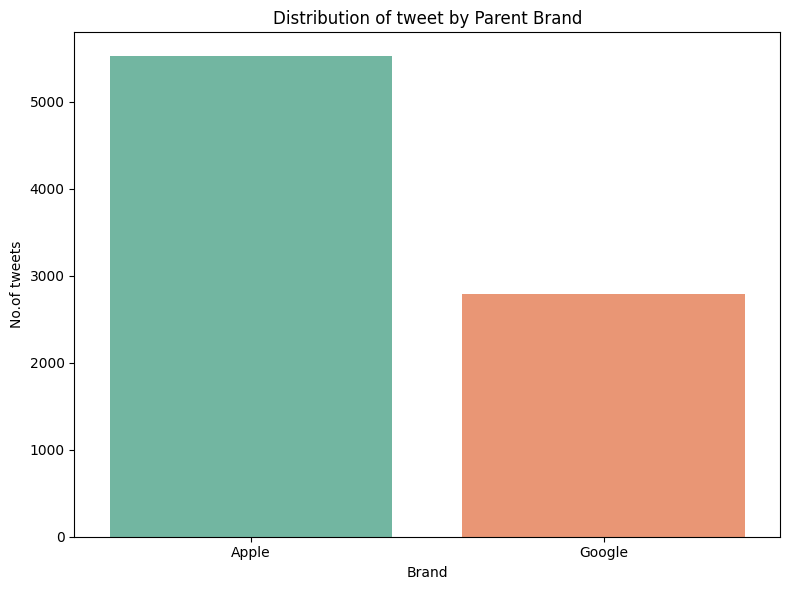

In [28]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x="parent_brand", palette="Set2")
plt.title("Distribution of tweet by Parent Brand" )
plt.xlabel("Brand")
plt.ylabel("No.of tweets")
plt.tight_layout()
plt.show()

Most tweets over 5000 are about Apple products while less than 3000 tweets are about Google products.

2. Sentiment Distribution

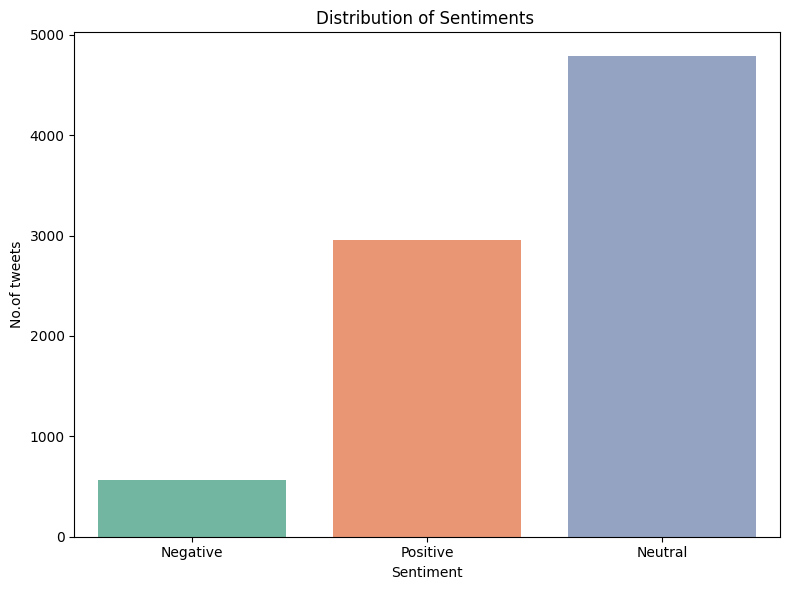

In [29]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x="sentiment_simple", palette="Set2")
plt.title("Distribution of Sentiments " )
plt.xlabel("Sentiment")
plt.ylabel("No.of tweets")
plt.tight_layout()
plt.show()

Neutral sentiment dominates the dataset followed by Positive and Negative sentiments respectively.

3. Tweet Length

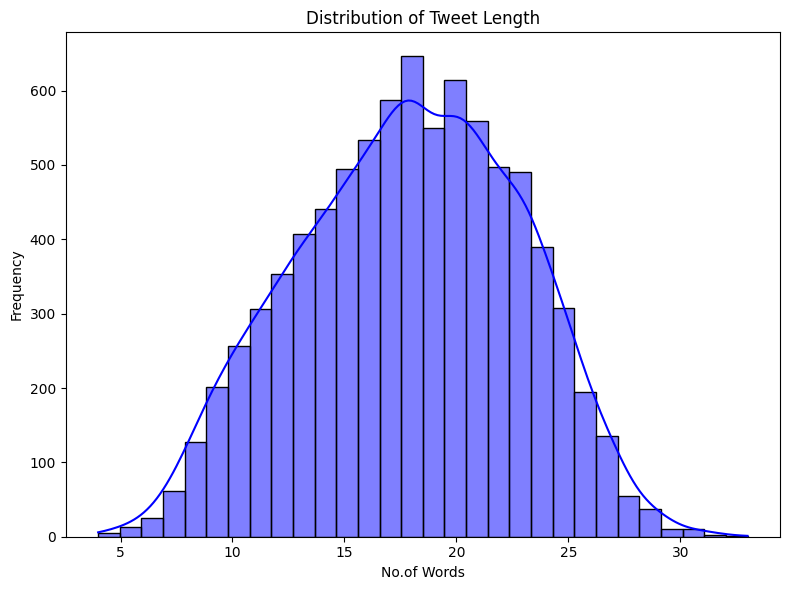

In [30]:
df["tweet_length"] = df["text"].apply(lambda x: len(x.split()))
plt.figure(figsize=(8,6))
sns.histplot(df["tweet_length"],bins=30,kde=True,color="blue")
plt.title("Distribution of Tweet Length")
plt.xlabel("No.of Words")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

Tweet length mostly range between fifteen (15) to twenty five(25) words.

General observation
- The dataset is skewed toward Apple with higher number of tweets compared to google, which may introduce some bias during modeling.
- Neutral sentiments is the most common followed by positive then negative,indicating that many tweets do not express a strong feeling towards a product.
- Tweet legnth are generally short to medium.Approximately from twelve (12) to twenty four (24) words suggesting that most opinions are brief,which can affect the textual feature for NLP Models.

### Bivariate Analysis
We will focus on the following key bivariate relationship:
1. **Parent Brand Vs Sentiments** to examine how sentiments vary between Apple and Google tweets
2. **Tweet length Vs Sentiments** to determine whether longer or shorter tweets are associated with certain sentiment type e.g whether negative opinions are expressed in longer tweets.
3. **Product Vs Sentiment** to analyse how sentiment distributions vary across individual products for a more granular understanding of customer opinions.

1. Parent Brand Vs Sentiments.


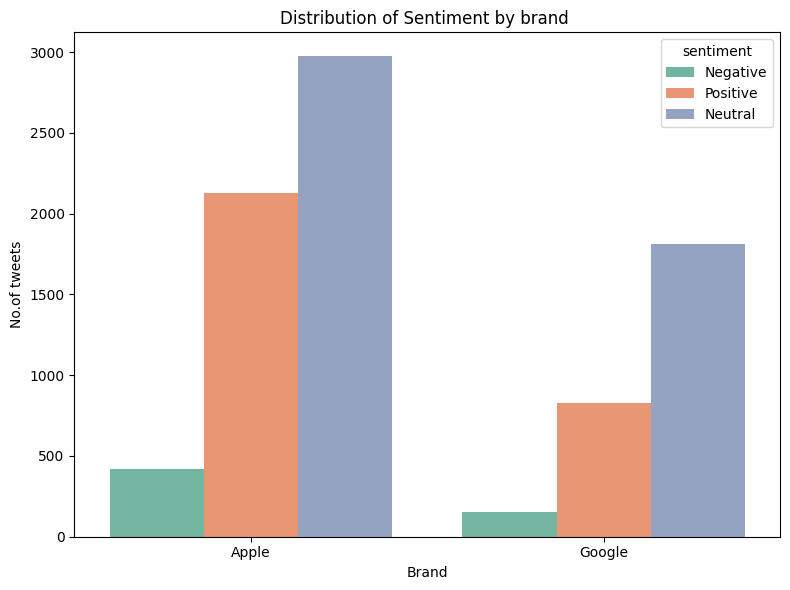

In [31]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x="parent_brand",hue="sentiment_simple", palette="Set2")
plt.title("Distribution of Sentiment by brand " )
plt.xlabel("Brand")
plt.ylabel("No.of tweets")
plt.legend(title="sentiment")
plt.tight_layout()
plt.show()

Apple tweets has higher proportion of positive sentiments compared to Google.

2. Tweet Length Vs Sentiments

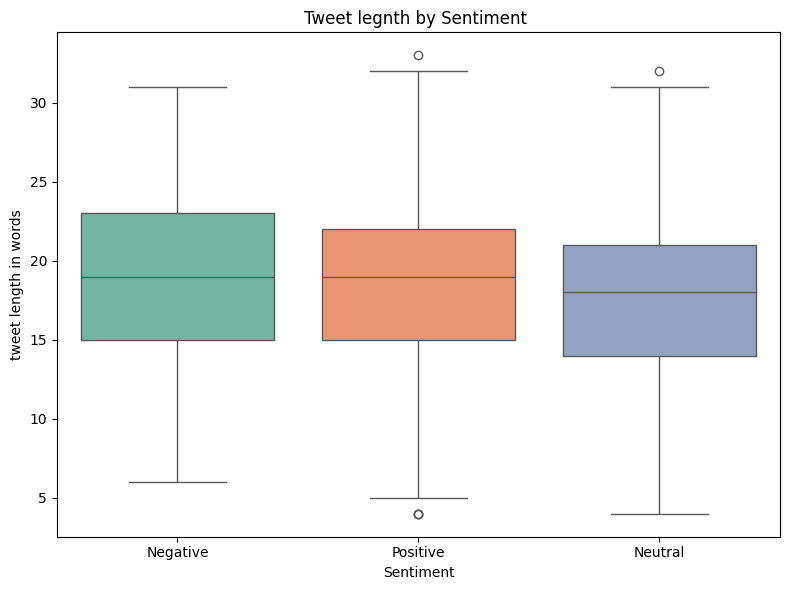

In [32]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x="sentiment_simple",y="tweet_length", palette="Set2")
plt.title("Tweet legnth by Sentiment ")
plt.xlabel("Sentiment")
plt.ylabel("tweet length in words")
plt.tight_layout()
plt.show()

Negative sentiment tweets tend to be slightly longer on avaerage compared to positive and neutral.

3. Product Vs Sentiment

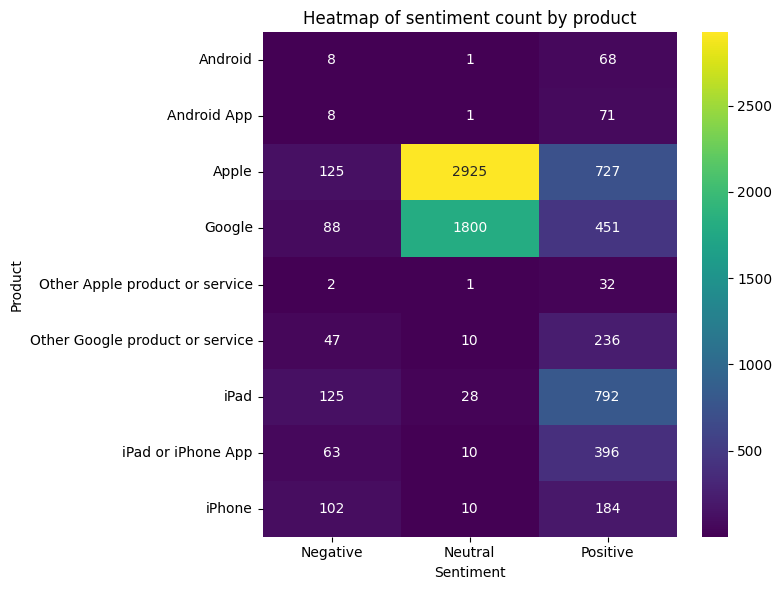

In [33]:
product_sentiment_counts = df.pivot_table(index = "brand",
                                          columns="sentiment_simple",
                                          values="text",
                                          aggfunc="count",
                                          fill_value=0)

plt.figure(figsize=(8,6))
sns.heatmap(product_sentiment_counts, annot=True,fmt="d",cmap="viridis")
plt.title("Heatmap of sentiment count by product" )
plt.xlabel("Sentiment")
plt.ylabel("Product")
plt.tight_layout()
plt.show()

Ipad show high positive sentiment count of 792.

General Observations
- Apple tweets have higher proportion of sentiment compared to Google.This indicates that brand influemces the distribution of sentiment in a dataset.
- Negative sentiment tweets tend to be slightly longer on average, suggesting that users may write more detailed tweets when expressing dissatisfaction.
- Positive and neutral tweets are generally shorter, indicating that praise or neutral comments are often brief.
- The heatmap highlights the concentration of sentiment counts per brand and product.
- It provides a clear visual understanding of which products attract the most positive, negative, or neutral tweets.
- This analysis helps to identify areas of strong public opinion, which can guide targeted marketing, product improvements, or customer engagement strategies.
- Apple dominates in tweet volume and positive sentiment.
- Google products have fewer mentions but similar sentiment patterns.
- Understanding product-specific sentiment helps identify which products drive customer satisfaction or dissatisfaction and can guide marketing strategies or product improvements.

## Multivariate Analysis

We will focus on the following key multivariate relationships.

1. **Parent Brand, Sentiment, and Tweet Length** To examine how tweet length varies for different sentiment types across Apple and Google products
2. **Product, Sentiment, and Parent Brand** To understand how sentiment distribution differs across individual products within each parent brand.


1. Parent brand,Sentiment and Tweet length


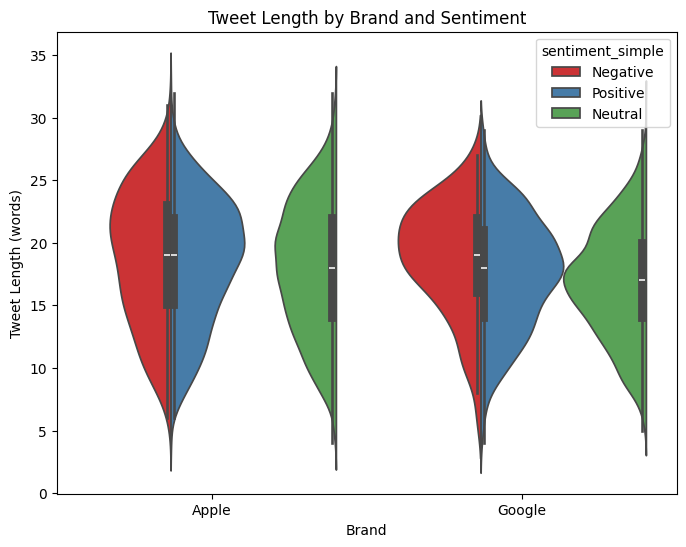

In [34]:
plt.figure(figsize=(8,6))
sns.violinplot(data=df, x='parent_brand', y='tweet_length', hue='sentiment_simple', split=True, palette='Set1')
plt.title("Tweet Length by Brand and Sentiment")
plt.xlabel("Brand")
plt.ylabel("Tweet Length (words)")
plt.show()

The violin plot shows how long tweets are in number of words,and whether the tweets are positive,negative or neutral.
- The shape of each color(violin shape)shows how length vary.
- For both apple and google most tweets have around 15-25 words.
- There isn't a huge difference in tweet length between positive and negative emotions.

This means that people tend to express their opinions in similarly size tweets,no matter whether they are happy,upset or neutral.

2. Product,Sentiment and Parent brand

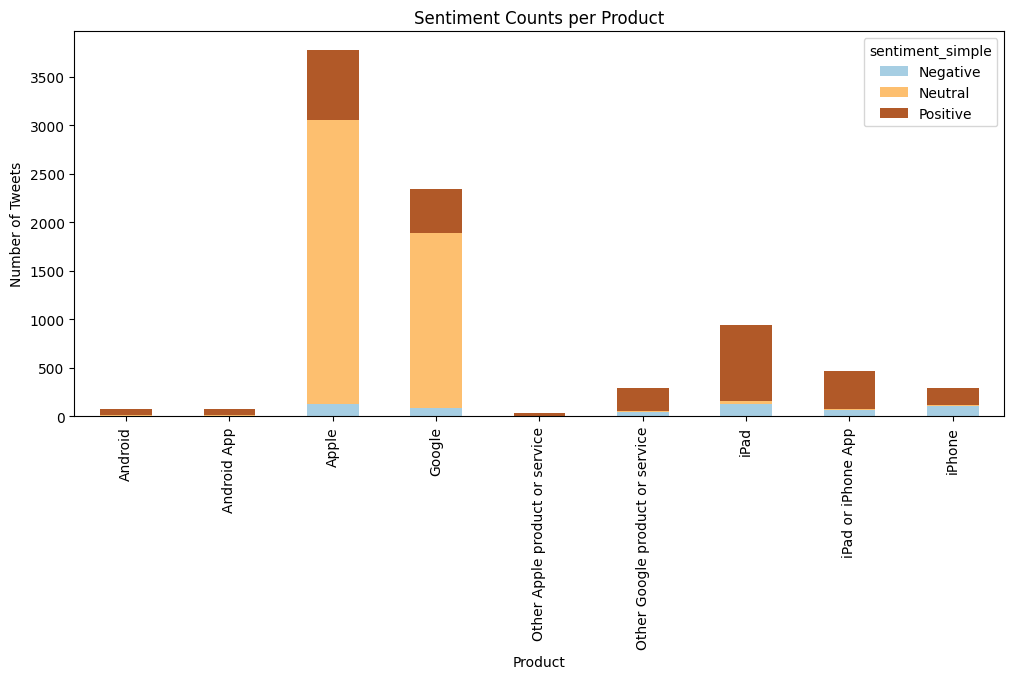

In [35]:
sentiment_counts = df.groupby(['brand', 'sentiment_simple']).size().unstack(fill_value=0)
sentiment_counts.plot(kind='bar', stacked=True, figsize=(12,5), colormap='Paired')
plt.title("Sentiment Counts per Product")
plt.xlabel("Product")
plt.ylabel("Number of Tweets") 
plt.show()

Apple has more neutral sentiment tweets compared to Google.They follow a similar pattern of sentiment distribution.

General Observations.
- Apple dominates in tweet volume and positive sentiments,suggesting that they generally elicit favourable opinions on social media.
- Google products have fewer mentions but similar sentiment patterns.Negative sentiment is slightly more pronounced for Google products compared to Apple,possibly reflecting critical user feedback.
- Neutral sentiment is common  across both Apple and Google products reflecting tweets then that mention products without expressing a strong opinion.This is important for model training as neutral tweets make up a substantial portion of the dataset.

### Text Preprocessing

In [36]:
#Load the clean dataset
df = pd.read_csv("clean_apple_google_tweets.csv")
df.head()

,text,brand,sentiment,sentiment_simple,parent_brand
0,.@wesley83 i have a 3g iphone. after 3 hrs twe...,iPhone,Negative emotion,Negative,Apple
1,@jessedee know about @fludapp ? awesome ipad/i...,iPad or iPhone App,Positive emotion,Positive,Apple
2,@swonderlin can not wait for #ipad 2 also. the...,iPad,Positive emotion,Positive,Apple
3,@sxsw i hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,Negative,Apple
4,@sxtxstate great stuff on fri #sxsw: marissa m...,Google,Positive emotion,Positive,Google


In [37]:
# Text preprocessing

# Convert to lowercase
df["text"] = df["text"].str.lower()
print("Lowercased:", df["text"])




Lowercased: 0       .@wesley83 i have a 3g iphone. after 3 hrs twe...
1       @jessedee know about @fludapp ? awesome ipad/i...
2       @swonderlin can not wait for #ipad 2 also. the...
3       @sxsw i hope this year's festival isn't as cra...
4       @sxtxstate great stuff on fri #sxsw: marissa m...
                              ...                        
8306                        ipad everywhere. #sxsw {link}
8307    wave, buzz... rt @mention we interrupt your re...
8308    google's zeiger, a physician never reported po...
8309    some verizon iphone customers complained their...
8310    ï¡ïàü_êîò£áââ_£â_ûârt @...
Name: text, Length: 8311, dtype: object


In [38]:
# Remove URLs, mentions, Hashtags, Punctuation, Digits, Extraspaces
def clean_text(text):
    # remove URLs
    text = re.sub(r'http\S+', '', text)
		# remove mentions
    text = re.sub(r'@\w+', '', text)
    # remove hashtags
    text = re.sub(r'#\w+', '', text)
    # remove punctuation
    text = re.sub(r'[^a-z\s]', '', text)
    # remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text
df["clean_text"] = df["text"].apply(clean_text)
df.head()

,text,brand,sentiment,sentiment_simple,parent_brand,clean_text
0,.@wesley83 i have a 3g iphone. after 3 hrs twe...,iPhone,Negative emotion,Negative,Apple,i have a g iphone after hrs tweeting at it was...
1,@jessedee know about @fludapp ? awesome ipad/i...,iPad or iPhone App,Positive emotion,Positive,Apple,know about awesome ipadiphone app that youll l...
2,@swonderlin can not wait for #ipad 2 also. the...,iPad,Positive emotion,Positive,Apple,can not wait for also they should sale them do...
3,@sxsw i hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,Negative,Apple,i hope this years festival isnt as crashy as t...
4,@sxtxstate great stuff on fri #sxsw: marissa m...,Google,Positive emotion,Positive,Google,great stuff on fri marissa mayer google tim or...


In [39]:
# Removing stopwords i.e common words that do not carry much meaning
stop_words = set(stopwords.words('english'))
df["clean_text"] = df["clean_text"].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
df.head(3)

,text,brand,sentiment,sentiment_simple,parent_brand,clean_text
0,.@wesley83 i have a 3g iphone. after 3 hrs twe...,iPhone,Negative emotion,Negative,Apple,g iphone hrs tweeting dead need upgrade plugin...
1,@jessedee know about @fludapp ? awesome ipad/i...,iPad or iPhone App,Positive emotion,Positive,Apple,know awesome ipadiphone app youll likely appre...
2,@swonderlin can not wait for #ipad 2 also. the...,iPad,Positive emotion,Positive,Apple,wait also sale


In [40]:
# Lemmatization to reduce words to their base form to ensure uniformity
lemmatizer = WordNetLemmatizer()
df["clean_text"] = df["clean_text"].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))
df.head(3)

,text,brand,sentiment,sentiment_simple,parent_brand,clean_text
0,.@wesley83 i have a 3g iphone. after 3 hrs twe...,iPhone,Negative emotion,Negative,Apple,g iphone hr tweeting dead need upgrade plugin ...
1,@jessedee know about @fludapp ? awesome ipad/i...,iPad or iPhone App,Positive emotion,Positive,Apple,know awesome ipadiphone app youll likely appre...
2,@swonderlin can not wait for #ipad 2 also. the...,iPad,Positive emotion,Positive,Apple,wait also sale


In [41]:
# tokenization to split each tweet into individual word-tokens to be used in feature extraction 
df["tokens"] = df["clean_text"].apply(word_tokenize)
df[["clean_text", "tokens"]].head()

,clean_text,tokens
0,g iphone hr tweeting dead need upgrade plugin ...,"[g, iphone, hr, tweeting, dead, need, upgrade,..."
1,know awesome ipadiphone app youll likely appre...,"[know, awesome, ipadiphone, app, youll, likely..."
2,wait also sale,"[wait, also, sale]"
3,hope year festival isnt crashy year iphone app,"[hope, year, festival, isnt, crashy, year, iph..."
4,great stuff fri marissa mayer google tim oreil...,"[great, stuff, fri, marissa, mayer, google, ti..."


#### Feature Extraction(Converting Text to Numbers)

In [42]:
# Using TF-IDF(Term Frequency-Inverse Document Frequency)

# initialize the vectorizer
tfidf = TfidfVectorizer()

# fit and transform cleaned text
X = tfidf.fit_transform(df["clean_text"])

print("Shape of TF-IDF matrix:" , X.shape)
print("-------"*15)
print("TF-IDF Vocabulary:", tfidf.get_feature_names_out())
print("-------"*15)
print("Vocabulary size:", len(tfidf.get_feature_names_out()))
print("-------"*15)
print("TF-IDF Representation:", X.toarray())


Shape of TF-IDF matrix: (8311, 7984)
---------------------------------------------------------------------------------------------------------
TF-IDF Vocabulary: ['aapl' 'aaron' 'ab' ... 'zuckerberg' 'zynga' 'zzzs']
---------------------------------------------------------------------------------------------------------
Vocabulary size: 7984
---------------------------------------------------------------------------------------------------------
TF-IDF Representation: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


TF-IDF assigns higher weight to words that are important in a specific tweet but rare across all tweets. It also helps the model focus on meaningful words that carry sentiments.


In [43]:
# Using CountVectorizer or Bag of Words(BoW)

#Initialize the vectorizer
vectorizer = CountVectorizer()

#Fit and transform cleaned text
X_bow = vectorizer.fit_transform(df["clean_text"])

print("Shape of Bag-of-Words matrix:", X_bow.shape)
print("-------"*15)
print("Bag-of-Words Vocabulary:", vectorizer.get_feature_names_out())
print("-------"*15)
print("Vocabulary size:", len(vectorizer.get_feature_names_out()))
print("-------"*15)
print("Bag-of-Words Representation:", X_bow.toarray())

Shape of Bag-of-Words matrix: (8311, 7984)
---------------------------------------------------------------------------------------------------------
Bag-of-Words Vocabulary: ['aapl' 'aaron' 'ab' ... 'zuckerberg' 'zynga' 'zzzs']
---------------------------------------------------------------------------------------------------------
Vocabulary size: 7984
---------------------------------------------------------------------------------------------------------
Bag-of-Words Representation: [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


Bag-of-Words (CountVectorizer) captures the raw frequency of words in each tweet, and is useful as a baseline model providing a straightforward representation of text.

Using both approches allows comparison of feature representations and model performance. While TF-IDF often yields better results for sentiment classification, BoW provides a simple, interpretable baseline.